Ce notebook reprèente des analyses sur des datasets spécifiques traitant: 

Les évolutions dans les styles de jeu à travers le temps, les types de jeu des joueurs.

Impact des diffèrents facteurs sur les performances des joueurs.

Les blessures (causes, types, solutions, ...)


In [141]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

In [73]:
df_kg = pd.read_csv('GOATList_nettoye.csv')
df_kg['dob'] = pd.to_datetime(df_kg['dob'])
df_kg['age'] = 2024 - df_kg['dob'].dt.year
df_kg.head()

,Unnamed: 0,rank,name,country_name,country_id,active,dob,totalPoints,tournamentPoints,rankingPoints,...,masters,olympics,bigTitles,titles,weeksAtNo1,wonLost,bestEloRating,bestEloRatingDate,wonPct,age
0,0,1,Novak Djokovic,Serbia,SRB,1,1987-05-22,1102,595,241,...,40,0,71,98,404,1084-210,2629,2016-02-01,83.8%,37
1,1,2,Roger Federer,Switzerland,SUI,0,1981-08-08,924,566,200,...,28,0,54,103,310,1245-275,2550,2007-03-05,81.9%,43
2,2,3,Rafael Nadal,Spain,ESP,0,1986-06-03,885,526,186,...,36,1,59,92,209,1066-219,2552,2013-09-09,83.0%,38
3,3,4,Jimmy Connors,United States,USA,0,1952-09-02,616,402,151,...,20,0,31,109,268,1275-285,2521,1978-10-29,81.7%,72
4,4,5,Ivan Lendl,United States,USA,0,1960-03-07,604,395,141,...,18,0,33,94,270,1069-242,2518,1986-03-24,81.5%,64


rank : Le classement du joueur.

active : Indique si le joueur est actif ou non.

totalPoints : Le total des points du joueur.

tournamentPoints : Les points du joueur dans les tournois.

rankingPoints : Les points de classement du joueur.

achievementsPoints : Les points de réalisations du joueur.

performancePoints : Les points de performance du joueur.

statisticsPoints : Les points de statistiques du joueur.

grandSlams : Le nombre de tournois du Grand Chelem remportés par le joueur.

tourFinals : Le nombre de finales de tournois remportées par le joueur.

altFinals : Le nombre d'autres finales de tournois remportées par le joueur.

masters : Le nombre de tournois Masters remportés par le joueur.

olympics : Le nombre de médailles olympiques remportées par le joueur.

bigTitles : Le nombre de grands titres remportés par le joueur.

titles : Le nombre total de titres remportés par le joueur.

weeksAtNo1 : Le nombre de semaines où le joueur a été classé n°1.

wonLost : Le ratio victoires/défaites du joueur.

bestEloRating : Le meilleur classement Elo du joueur.

bestEloRatingDate : La date à laquelle le meilleur classement Elo a été atteint.

wonPct : Le pourcentage de victoires du joueur.

I. Identifier les critères qui impactent la performance d'un joueur

I.1. Relation entre Totalpoints et le Rank

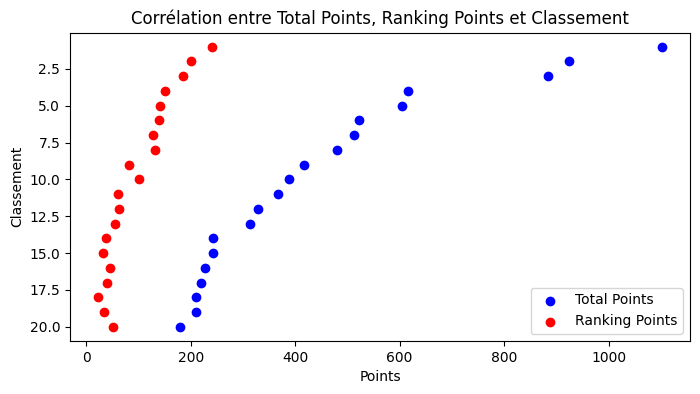

In [5]:
plt.figure(figsize=(8, 4))
plt.scatter(df_kg['totalPoints'], df_kg['rank'], color='blue', label='Total Points')
plt.scatter(df_kg['rankingPoints'], df_kg['rank'], color='red', label='Ranking Points')
plt.title('Corrélation entre Total Points, Ranking Points et Classement')
plt.xlabel('Points')
plt.ylabel('Classement')
plt.gca().invert_yaxis() 
plt.legend()
plt.show()

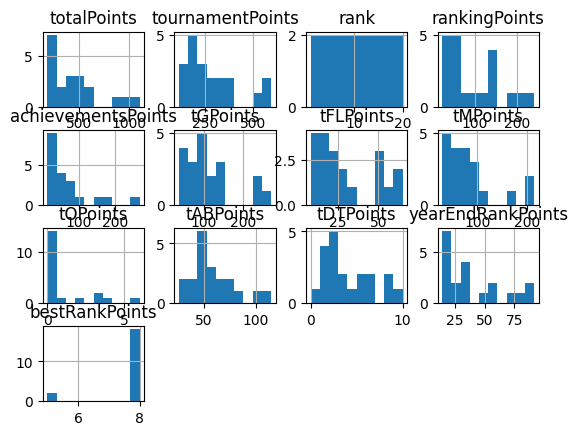

In [6]:
viz = df_kg[['totalPoints','tournamentPoints','rank','rankingPoints', 'achievementsPoints', 'tGPoints', 'tFLPoints', 'tMPoints', 'tOPoints', 'tABPoints', 'tDTPoints', 'yearEndRankPoints', 'bestRankPoints']]
viz.hist()
plt.show()

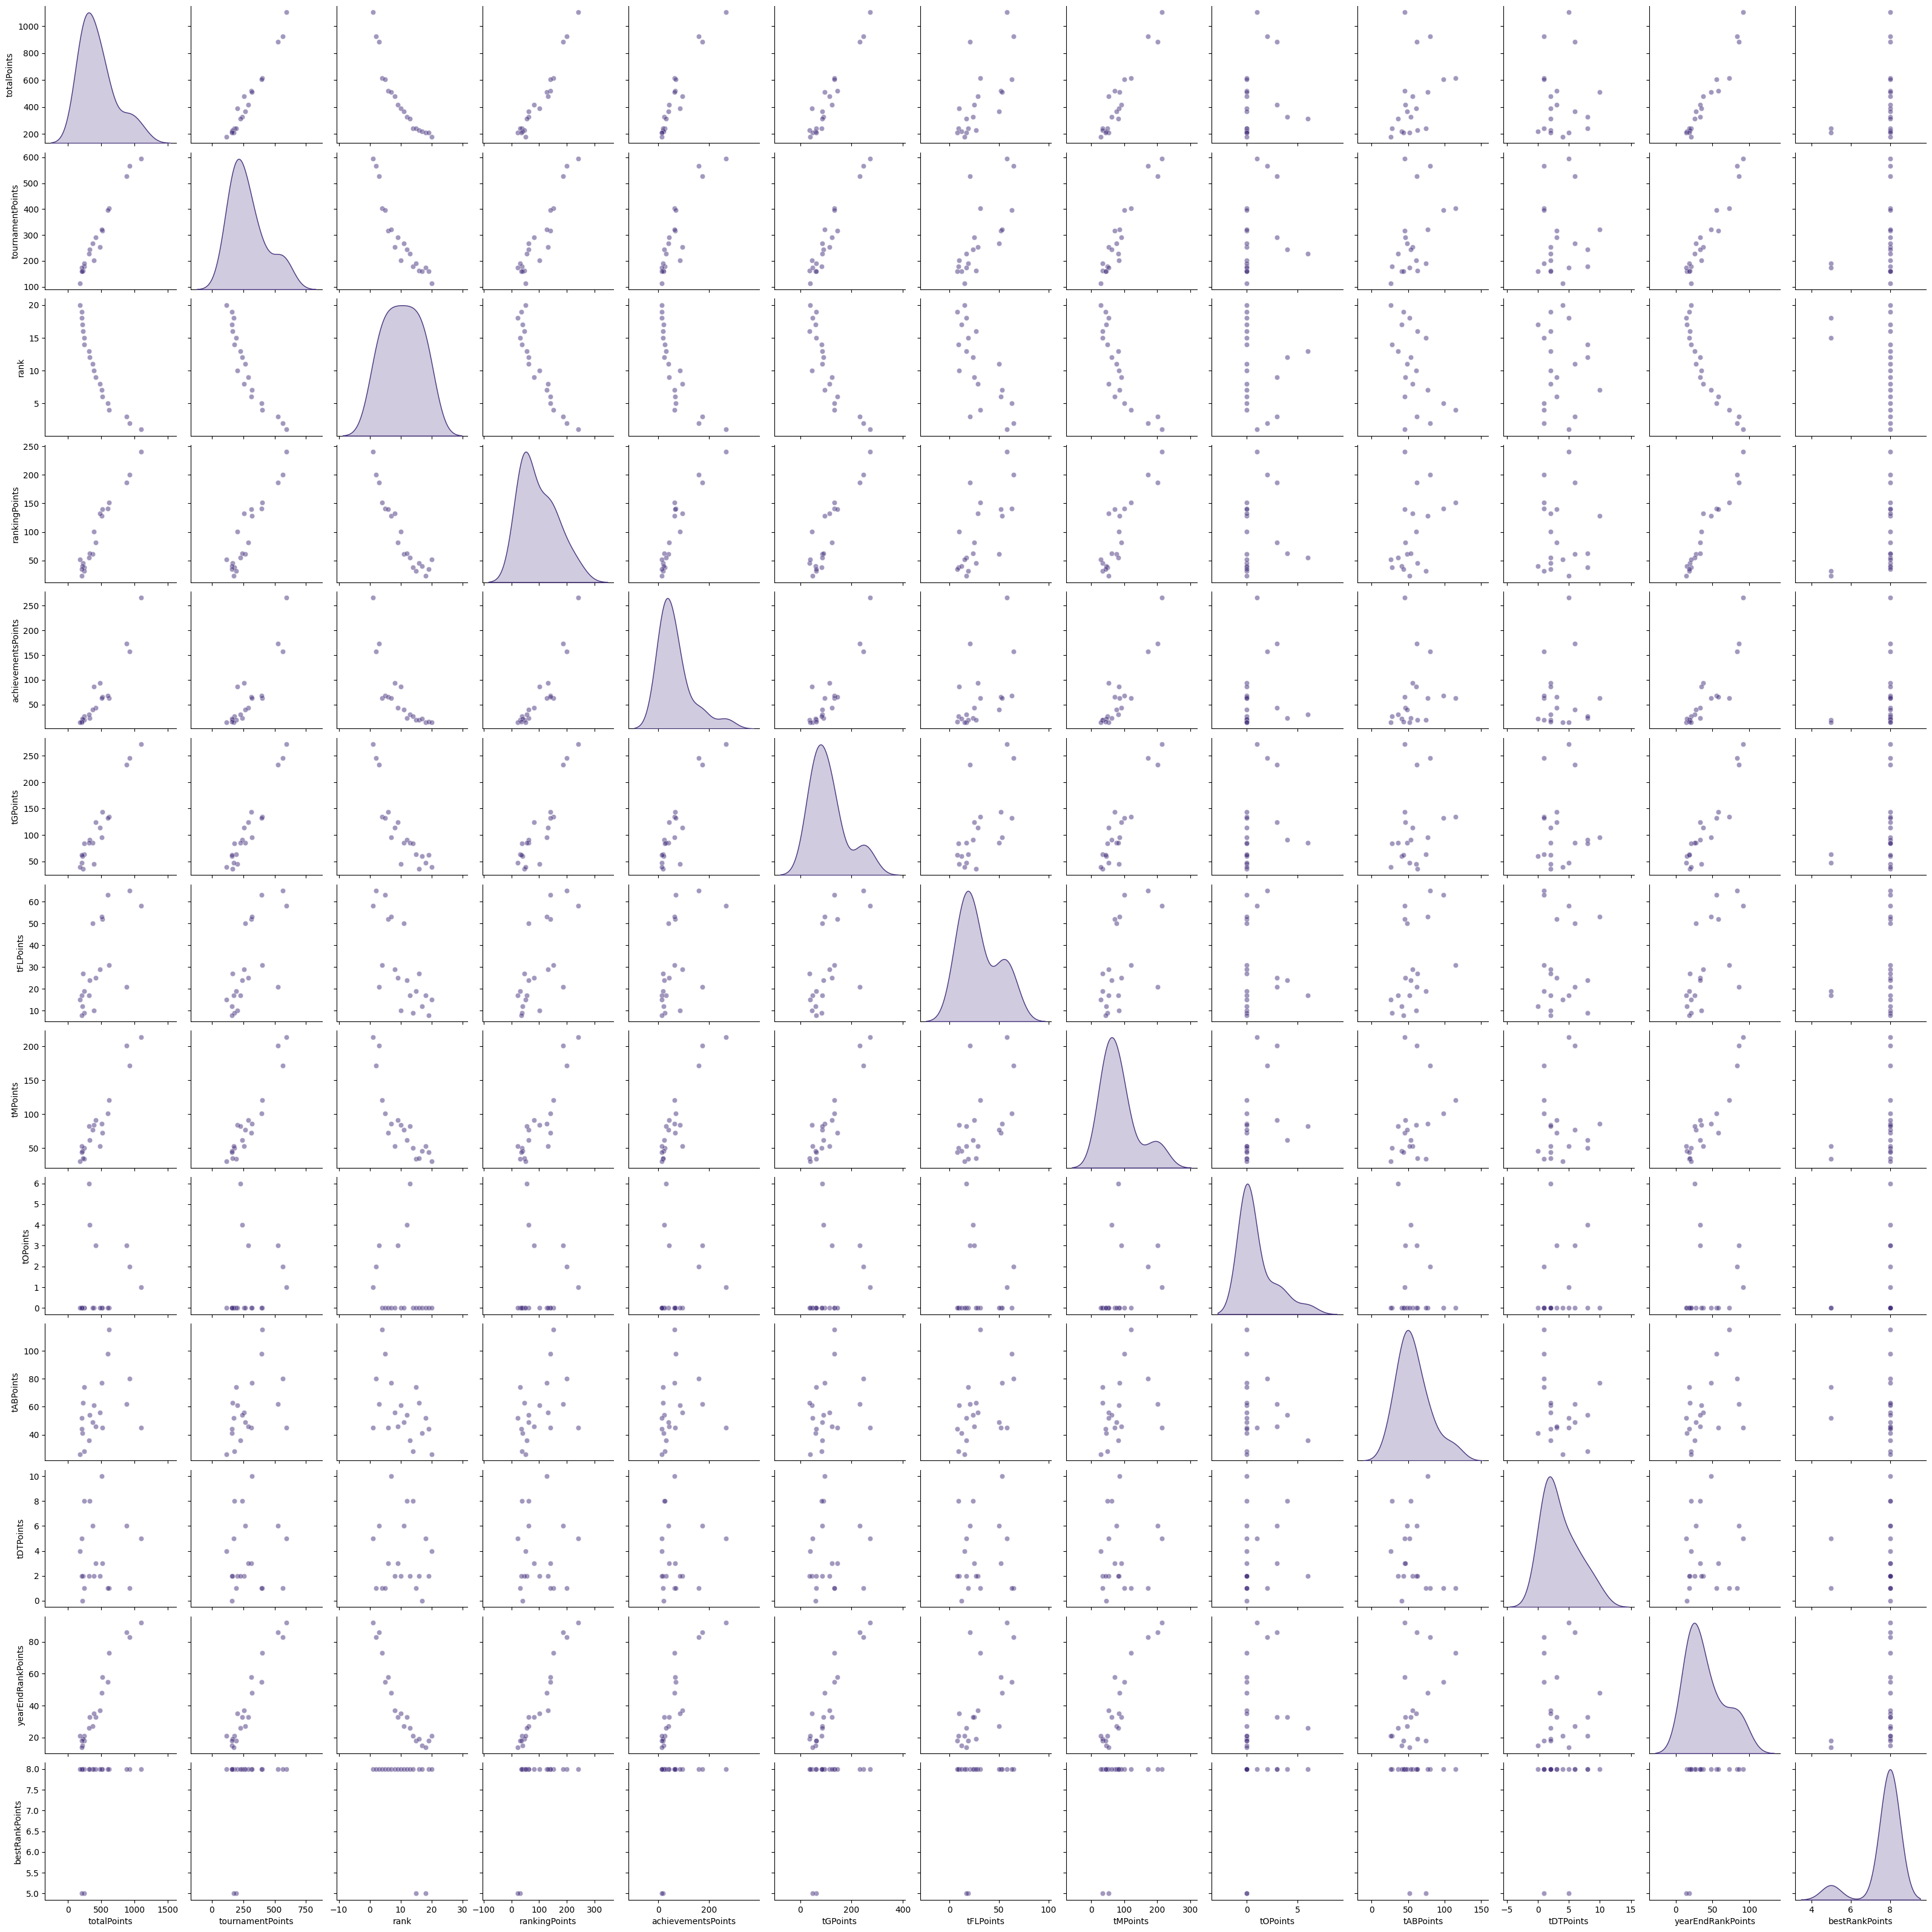

In [61]:
viz = df_kg[['totalPoints', 'tournamentPoints', 'rank', 'rankingPoints', 'achievementsPoints', 'tGPoints', 'tFLPoints', 'tMPoints', 'tOPoints', 'tABPoints', 'tDTPoints', 'yearEndRankPoints', 'bestRankPoints']]
sns.pairplot(viz, kind="scatter", diag_kind="kde", markers=["o", "s"], plot_kws={'alpha':0.5})
plt.show()

1. Test d'un modèle de régression linéaire de la colonne 'totalPoints' et la cible 'rank' 

Mean Squared Error: 22.519739853756846
R^2 Score: 0.6289229272295473


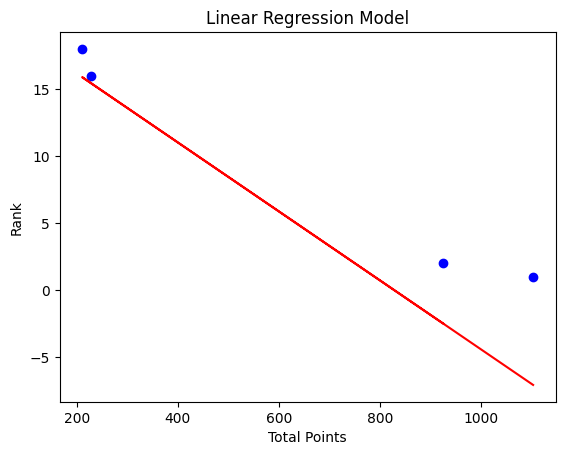

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_kg[['totalPoints']], df_kg['rank'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Total Points')
plt.ylabel('Rank')
plt.title('Linear Regression Model')
plt.show()

2. Regrèssion multiple

In [50]:
X = df_kg[['totalPoints', 'tournamentPoints', 'rankingPoints', 'achievementsPoints', 'bestEloRating', 'wonPct', 'age', 'bestRankPoints']]
y = df_kg['rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.2638455747536097
R^2 Score: 0.9791745322388694


Mean Squared Error: 7.407235817885383
R^2 Score: 0.8779446209205293


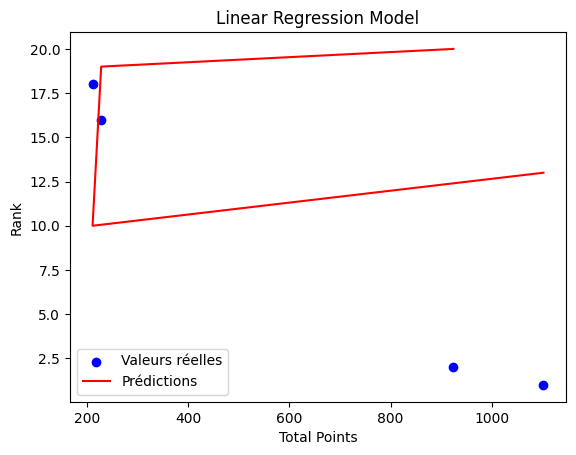

In [92]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

plt.scatter(X_test['totalPoints'], y_test, color='blue', label='Valeurs réelles')
plt.plot(X_test['totalPoints'], y_pred, color='red', label='Prédictions')
plt.xlabel('Total Points')
plt.ylabel('Rank')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

-------------------------------------------------------------------------- Fin Goatlist --------------------------------------------------------------------------------------------------------------------

3. Dataset 'KaggleMatches'

In [144]:
df_m = pd.read_csv('KaggleMatches_cleaned.csv')
df_m.head()

C:\Users\sonia\AppData\Local\Temp\ipykernel_32188\3605540405.py:1: DtypeWarning: Columns (3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_m = pd.read_csv('KaggleMatches_cleaned.csv')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,league
0,2019-M020,Brisbane,Hard,32,A,2018-12-31,300,105453,2.0,0,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,atp
1,2019-M020,Brisbane,Hard,32,A,2018-12-31,299,106421,4.0,0,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,atp
2,2019-M020,Brisbane,Hard,32,A,2018-12-31,298,105453,2.0,0,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,atp
3,2019-M020,Brisbane,Hard,32,A,2018-12-31,297,104542,0,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,atp
4,2019-M020,Brisbane,Hard,32,A,2018-12-31,296,106421,4.0,0,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,atp


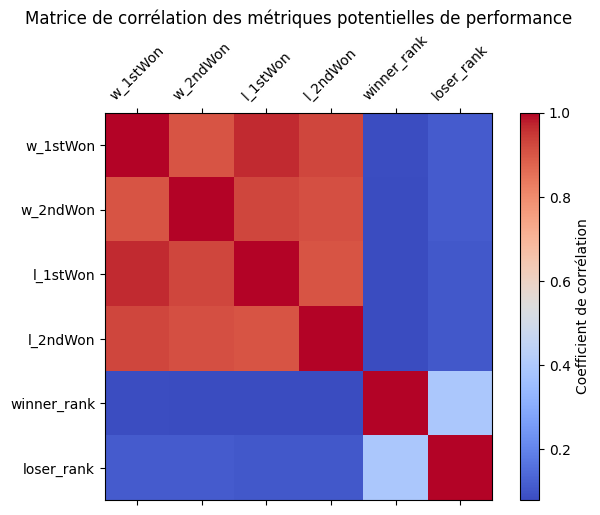

In [111]:
correlations = df_m[['w_1stWon', 'w_2ndWon', 'l_1stWon', 'l_2ndWon', 'winner_rank', 'loser_rank']].corr()
plt.figure(figsize=(7, 5))
plt.matshow(correlations, cmap='coolwarm', fignum=1)
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=45)
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.colorbar(label='Coefficient de corrélation')
plt.title('Matrice de corrélation des métriques potentielles de performance')
plt.show()

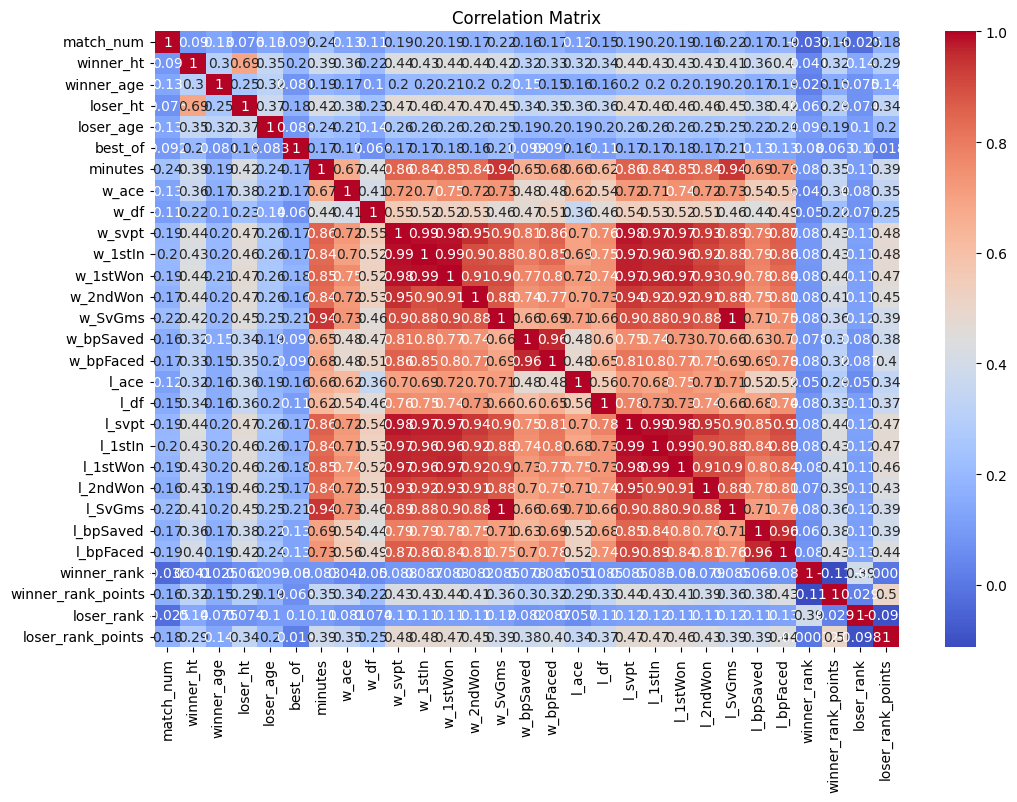

In [145]:
df_m.drop(['tourney_id', 'tourney_name', 'winner_id', 'loser_id', 'winner_ioc', 'loser_ioc', 'score', 'league'], axis=1, inplace=True)
df_m['tourney_date'] = pd.to_datetime(df_m['tourney_date'])
numeric_columns = df_m.select_dtypes(include=['float64', 'int64']).column
plt.figure(figsize=(12, 8))
sns.heatmap(df_m[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

------------------------------------------------------------------ FIN  KAGGLE MATCHS --------------------------------------------------------------------------------

In [115]:
dfff = pd.read_excel('atp_players_00_12.xlsx')
dfff.head()

,year,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,2000,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
dffff = pd.read_excel('merged_wta_datasets.xlsx')
dffff.head()



,year,WTA,Location,Tournament,Date,Tier,Court,Surface,Round,Best of,...,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,2010,1,Auckland,ASB Classic,2010-01-03 00:00:00,International,Outdoor,Hard,1st Round,3,...,1.167,4.500,1.261,4.410,1.200,4.000,0.0,0.0,0.0,0.0
1,2010,1,Auckland,ASB Classic,2010-01-04 00:00:00,International,Outdoor,Hard,1st Round,3,...,1.143,5.000,1.137,7.140,1.154,4.750,0.0,0.0,0.0,0.0
2,2010,1,Auckland,ASB Classic,2010-01-04 00:00:00,International,Outdoor,Hard,1st Round,3,...,1.333,3.250,1.341,3.650,1.286,3.250,0.0,0.0,0.0,0.0
3,2010,1,Auckland,ASB Classic,2010-01-04 00:00:00,International,Outdoor,Hard,1st Round,3,...,2.200,1.615,2.200,1.769,2.250,1.571,0.0,0.0,0.0,0.0
4,2010,1,Auckland,ASB Classic,2010-01-04 00:00:00,International,Outdoor,Hard,1st Round,3,...,2.000,1.727,1.926,2.000,1.909,1.800,0.0,0.0,0.0,0.0


In [117]:
ddf = pd.read_csv('atp_players_Nettoye.csv')
ddf.head()

,Unnamed: 0,first_name,last_name,flag_code,residence,birthplace,birthdate,turned_pro,weight_kg,height_cm,handedness,backhand,age
0,0,Ricardo,Acuna,CHI,"Jupiter, FL, USA","Santiago, Chile",1958-01-13,0.0,68.0,175.0,0,0,66.0
1,1,Sadiq,Abdullahi,NGR,0,0,1960-02-02,0.0,0.0,0.0,0,0,64.0
2,2,Nelson,Aerts,BRA,0,"Cachoeira Do Sul, Brazil",1963-04-25,0.0,75.0,188.0,0,0,61.0
3,3,Egan,Adams,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959-06-15,0.0,73.0,178.0,0,0,65.0
4,4,Ronald,Agenor,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964-11-13,1983.0,82.0,180.0,0,0,60.0


--------------------------- ------------------------------------- Fin atp_players---------------------------------------------- -------------------------------- 

In [126]:
df13 = pd.read_csv('events_time.csv')
df13.head()


,tournament,surface,seconds_added_per_point,years
0,Wimbledon,Grass,-2.98,1991-2014
1,London Olympics,Grass,-2.62,2012
2,Manchester,Grass,-2.33,1991-1994
3,Eastbourne,Grass,-1.78,2009-2014
4,Birmingham,Carpet,-1.63,1991


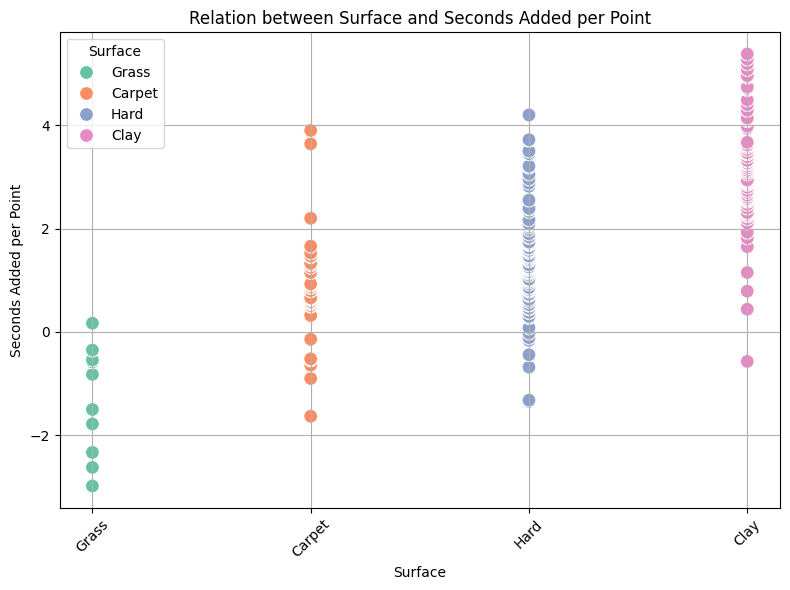

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df13, x='surface', y='seconds_added_per_point', hue='surface', palette='Set2', s=100)
plt.title('Relation between Surface and Seconds Added per Point')
plt.xlabel('Surface')
plt.ylabel('Seconds Added per Point')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Surface')
plt.tight_layout()
plt.show()